<a href="https://colab.research.google.com/github/abdelrahmanEmad5005/Projects/blob/main/Stock_market_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365*2)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [ ]:
data = yf.download('GOOG',
 start=start_date,
 end=end_date,
progress=False)

In [ ]:
data["Date"] = data.index
features = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
data = data[features]
data.reset_index(drop=True, inplace=True)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-01,145.649994,146.820496,145.614502,145.841995,145.841995,15824000
1,2021-09-02,145.949493,146.324997,144.106506,144.218994,144.218994,21844000
2,2021-09-03,144.145996,145.376999,143.505005,144.774994,144.774994,19104000
3,2021-09-07,144.749496,145.824005,144.541000,145.518997,145.518997,15170000
4,2021-09-08,145.393494,145.550995,144.199997,144.883499,144.883499,15486000


In [ ]:
data.shape

(503, 7)

In [ ]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"], open=data["Open"], high=data["High"], low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=True)
figure.show()


In [ ]:
figure = px.line(data, x='Date', y='Close', title='Stock_Market_Analysis_with_Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
Stock_market_Scaled = scaler.fit_transform(data['Close'].values.reshape(-1,1))
Stock_market_Scaled

array([[0.92759481],
       [0.90344984],
       [0.91172131],
       [0.92278965],
       [0.91333551],
       [0.91378179],
       [0.86926324],
       [0.8922328 ],
       [0.89135522],
       [0.91813318],
       [0.90574845],
       [0.86245707],
       [0.82606107],
       [0.835426  ],
       [0.85464687],
       [0.86785742],
       [0.87985534],
       [0.86301504],
       [0.78391536],
       [0.75917519],
       [0.74049753],
       [0.78805836],
       [0.74792842],
       [0.78381117],
       [0.80132112],
       [0.82856784],
       [0.84151803],
       [0.82353954],
       [0.79178503],
       [0.80944368],
       [0.86169094],
       [0.86560353],
       [0.88472747],
       [0.89754395],
       [0.87661218],
       [0.88204976],
       [0.82022941],
       [0.82243109],
       [0.83580532],
       [0.9363053 ],
       [0.93186448],
       [0.96372295],
       [0.8968298 ],
       [0.92790739],
       [0.94169794],
       [0.9698597 ],
       [0.9781609 ],
       [0.979

In [ ]:
Training_size = int(0.7 * len(Stock_market_Scaled))
Test_size = len(Stock_market_Scaled) - Training_size
Train_data, Test_data = Stock_market_Scaled[:Training_size], Stock_market_Scaled[Training_size:]

In [ ]:
len(Train_data) + len(Test_data) == len(data)

True

In [ ]:
def Create_Dataset(Dataset, Time_step=1):
  dataX, dataY = [], []
  for i in range(len(Dataset)-Time_step-1):
    a = Dataset[i:(i+Time_step), 0]
    dataX.append(a)
    dataY.append(Dataset[i+Time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
Time_step = 50
X_train, y_train = Create_Dataset(Train_data, Time_step)
X_test, y_test = Create_Dataset (Test_data, Time_step)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(301, 50)
(301,)
(100, 50)
(100,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(Time_step,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer = "adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
5/5 [==============================] - 8s 103ms/step - loss: 0.1616
Epoch 2/100
5/5 [==============================] - 1s 101ms/step - loss: 0.0347
Epoch 3/100
5/5 [==============================] - 1s 104ms/step - loss: 0.0235
Epoch 4/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0178
Epoch 5/100
5/5 [==============================] - 1s 113ms/step - loss: 0.0154
Epoch 6/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0117
Epoch 7/100
5/5 [==============================] - 1s 105ms/step - loss: 0.0092
Epoch 8/100
5/5 [==============================] - 1s 127ms/step - loss: 0.0089
Epoch 9/100
5/5 [==============================] - 1s 191ms/step - loss: 0.0078
Epoch 10/100
5/5 [==============================] - 1s 190ms/step - loss: 0.0075
Epoch 11/100
5/5 [==============================] - 1s 183ms/step - loss: 0.0076
Epoch 12/100
5/5 [==============================] - 1s 109ms/step - loss: 0.0075
Epoch 13/100
5/5 [=====================

In [ ]:
# Evaluate the model
Train_loss = model.evaluate(X_train, y_train)
print(Train_loss)
Test_loss = model.evaluate(X_test, y_test)
print(Test_loss)

10/10 [==============================] - 2s 36ms/step - loss: 0.0049
0.004897773265838623
4/4 [==============================] - 0s 31ms/step - loss: 0.0077
0.007698980625718832


In [ ]:
# Make Predictions
Train_pred = model.predict(X_train)
Test_pred = model.predict(X_test)
# Invert The Predictions To It's Original Range
Train_pred = scaler.inverse_transform(Train_pred)
Test_pred = scaler.inverse_transform(Test_pred)

4/4 [==============================] - 0s 24ms/step


In [ ]:
# Calculate RMSE For Training
train_error = np.sqrt(mean_squared_error(y_train, Train_pred))
print(train_error)

116.31759043415082


In [ ]:
# Calculate RMSE For Testing
test_error = np.sqrt(mean_squared_error(y_test, Test_pred))
print(test_error)

115.71897753681935


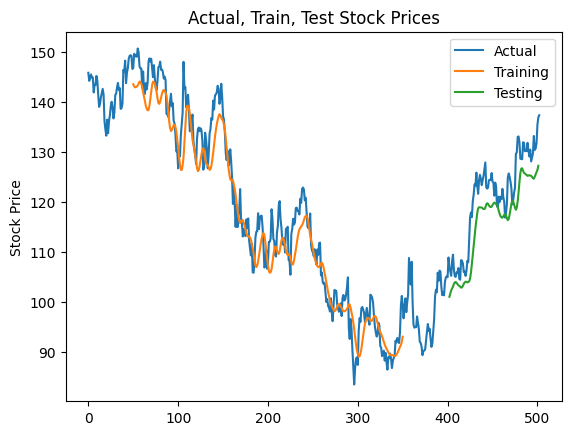

In [ ]:
look_back=50
# shift train predictions for plotting
trainPredictPlot = np.empty_like(Stock_market_Scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(Train_pred)+look_back, :] = Train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(Stock_market_Scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(Train_pred)+(look_back*2)+1:len(Stock_market_Scaled)-1, :] = Test_pred
# plot baseline , Train , Test
plt.plot(scaler.inverse_transform(Stock_market_Scaled), label="Actual")
plt.plot(trainPredictPlot, label="Training")
plt.plot(testPredictPlot, label="Testing")
plt.ylabel("Stock Price")
plt.title("Actual, Train, Test Stock Prices")
plt.legend()
plt.show()